<a href="https://colab.research.google.com/github/abhi3534/Python-capestone-almabetter/blob/main/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/IPL Data/'
df1 = pd.DataFrame(pd.read_excel((working_dir_path + 'Copy of Players.xlsx')))
df2 = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of deliveries.csv')))
df3 = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of most_runs_average_strikerate.csv')))
df4 = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of teamwise_home_and_away.csv')))
df5 = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of matches.csv')))
df6 = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of teams.csv')))

## RELATION OF PLAYERS AND COUNTRIES

In [ ]:
df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True, axis=1)

In [ ]:
df.dropna(axis=0, how='any')

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India
...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_Hand,Right-arm offbreak,India
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India


In [ ]:
# creating a data frame that has counts of countries and players

country_of_players = pd.DataFrame(df['Country'].value_counts()) # taking values and converting to df
country_of_players = country_of_players.reset_index() # resetting the index
country_of_players.columns = ['Country', 'Number_of_players'] # renaming columns
country_of_players

,Country,Number_of_players
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


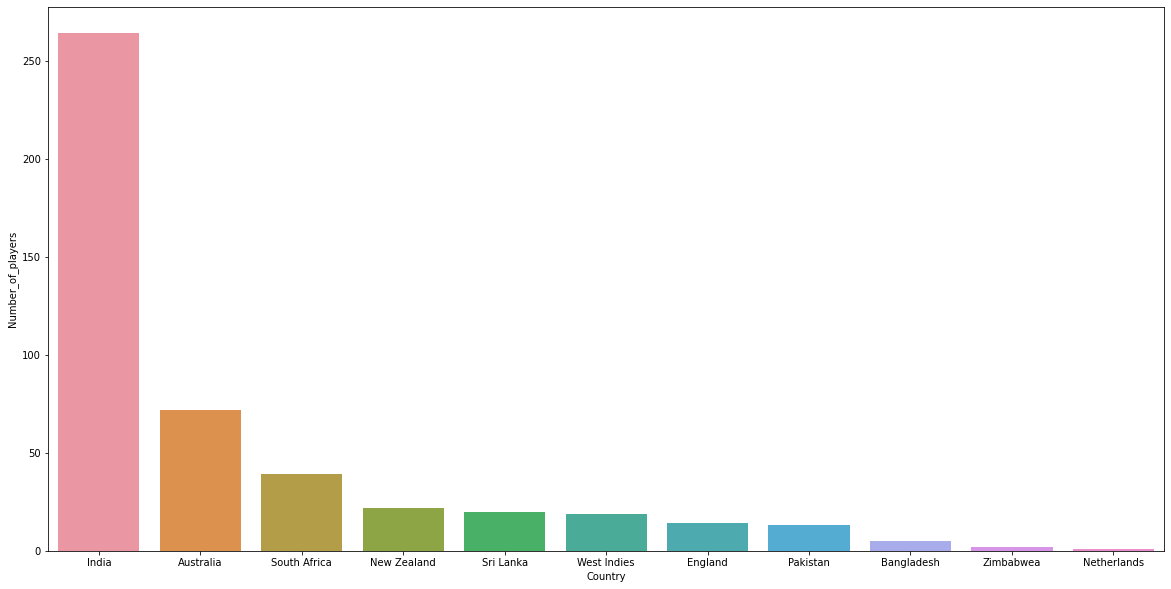

In [ ]:
#visualizing data

plt.figure(figsize=(20, 10)) # setting size of plot
sns.barplot(x="Country", y='Number_of_players', data=country_of_players) # bar plot with country as x axis and number of players as

## Players and batting hand

In [ ]:
# creating a data frame that has counts of batting hand and players
df.replace(to_replace='Right_hand', value='Right_Hand',inplace=True)
Hand_of_players = pd.DataFrame(df['Batting_Hand'].value_counts()) # taking values and converting to df
Hand_of_players = Hand_of_players.reset_index() # resetting the index
Hand_of_players.columns = ['Batting_hand', 'Number_of_players'] # renaming columns
Hand_of_players

,Batting_hand,Number_of_players
0,Right_Hand,421
1,Left_Hand,142


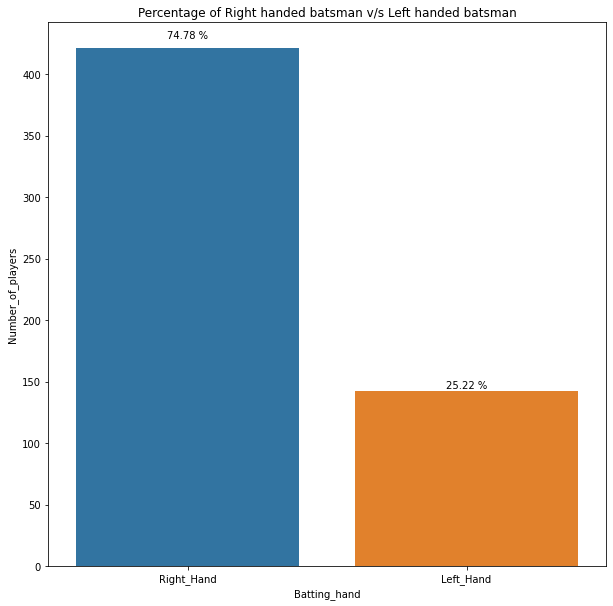

In [ ]:
#visualizing data

plt.figure(figsize=(10, 10)) # setting size of plot
plt.title('Percentage of Right handed batsman v/s Left handed batsman')
ax = sns.barplot(x="Batting_hand", y='Number_of_players', data=Hand_of_players) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

##Bowelers and their type


In [ ]:
# creating a data frame that has counts of Bowling Type and players
df.replace(to_replace='Right-arm Fast', value='Right-arm fast',inplace=True)
df.replace(to_replace='Right-arm Medium', value='Right-arm medium',inplace=True)
df.replace(to_replace='Right-arm bowler', value='Right-arm medium',inplace=True)
Type_of_bowlers = pd.DataFrame(df['Bowling_Skill'].value_counts()) # taking values and converting to df
Type_of_bowlers = Type_of_bowlers.reset_index() # resetting the index
Type_of_bowlers.columns = ['Bowling_Skill', 'Number_of_players'] # renaming columns
Type_of_bowlers

,Bowling_Skill,Number_of_players
0,Right-arm medium,109
1,Right-arm offbreak,91
2,Right-arm fast-medium,68
3,Slow left-arm orthodox,50
4,Right-arm fast,40
5,Right-arm medium-fast,38
6,Legbreak,30
7,Legbreak googly,28
8,Left-arm fast-medium,19
9,Left-arm medium,11


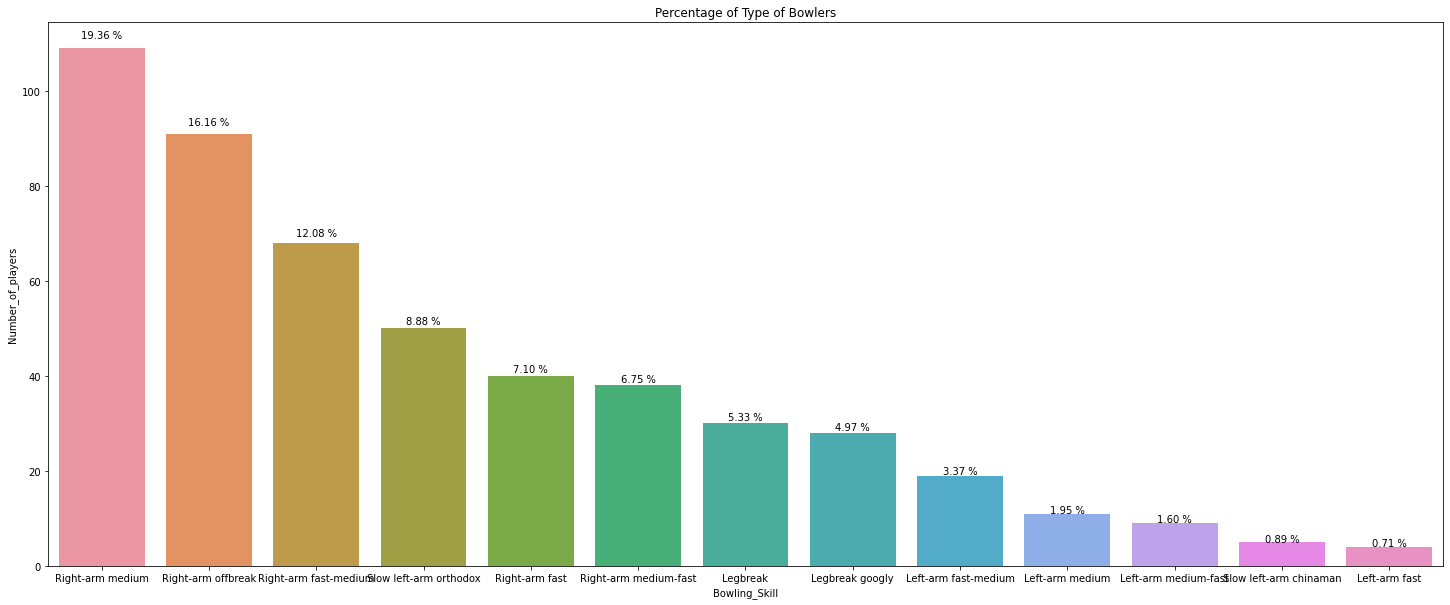

In [ ]:
#visualizing data

plt.figure(figsize=(25, 10)) # setting size of plot
plt.title('Percentage of Type of Bowlers')
ax = sns.barplot(x="Bowling_Skill", y='Number_of_players', data = Type_of_bowlers) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

##Age group of players as of in 2020

In [ ]:
Age_of_players = pd.DataFrame(df['DOB'].dt.year.value_counts()) # taking values and converting to df
Age_of_players = Age_of_players.reset_index() # resetting the index
Age_of_players.columns = ['Year_of_Birth', 'Number_of_players'] # renaming columns
Age_of_players['Age'] = 2020 - Age_of_players['Year_of_Birth']
Age_of_players

,Year_of_Birth,Number_of_players,Age
0,1984.0,41,36.0
1,1990.0,33,30.0
2,1981.0,32,39.0
3,1983.0,32,37.0
4,1987.0,31,33.0
5,1985.0,31,35.0
6,1988.0,30,32.0
7,1989.0,26,31.0
8,1986.0,24,34.0
9,1982.0,23,38.0


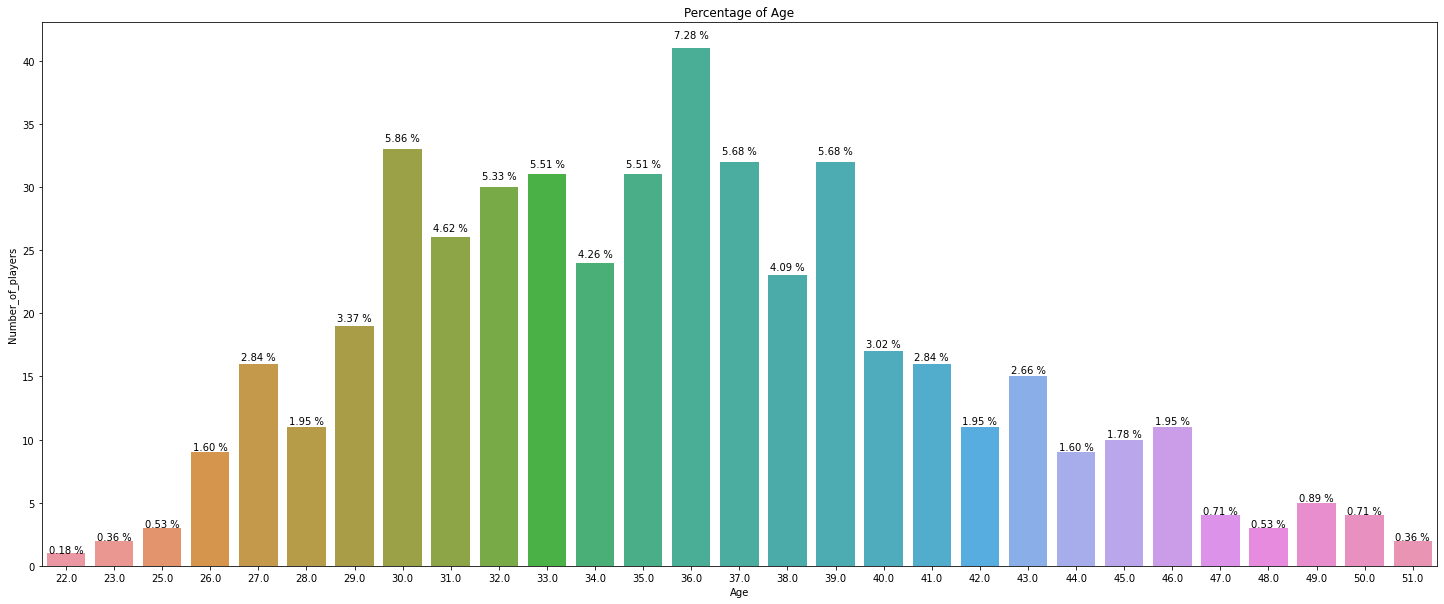

In [ ]:
#visualizing data

plt.figure(figsize=(25, 10)) # setting size of plot
plt.title('Percentage of Age')
ax = sns.barplot(x="Age", y='Number_of_players', data = Age_of_players) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

## Maax 4

In [ ]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
fours = [4]
df_fours = df2[df2['batsman_runs'].isin(fours)]
max_4_df = df_fours[["batsman",'batsman_runs']]
max_4_df

4    20392
Name: batsman_runs, dtype: int64

In [ ]:
# creating a data frame that has counts of countries and players
max_4_sorted_df = pd.DataFrame(max_4_df.value_counts()) # taking values and converting to df
max_4_sorted_df = max_4_sorted_df.reset_index() # resetting the index
max_4_sorted_df.columns = ['batsman','batsman_runs','no_of_times'] # renaming columns
top_4_scoreses = max_4_sorted_df.head(5)
top_4_scoreses

,batsman,batsman_runs,no_of_times
0,S Dhawan,4,526
1,SK Raina,4,495
2,G Gambhir,4,492
3,V Kohli,4,482
4,DA Warner,4,459


## Maax 6

In [ ]:
df2.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
six = [6]
df_sixes = df2[df2['batsman_runs'].isin(six)]
max_6_df = df_sixes[["batsman",'batsman_runs']]
max_6_df

,batsman,batsman_runs
10,DA Warner,6
47,MC Henriques,6
75,Yuvraj Singh,6
89,Yuvraj Singh,6
91,MC Henriques,6
...,...,...
178987,SR Watson,6
179048,DJ Bravo,6
179061,SR Watson,6
179062,SR Watson,6


In [ ]:
# creating a data frame that has counts of countries and players
max_6_sorted_df = pd.DataFrame(max_6_df.value_counts()) # taking values and converting to df
max_6_sorted_df = max_6_sorted_df.reset_index() # resetting the index
max_6_sorted_df.columns = ['batsman','batsman_runs','no_of_times'] # renaming columns
top_6_scoreses = max_6_sorted_df.head(5)
top_6_scoreses

,batsman,batsman_runs,no_of_times
0,CH Gayle,6,327
1,AB de Villiers,6,214
2,MS Dhoni,6,207
3,SK Raina,6,195
4,RG Sharma,6,194


## TOP 5 of Best strike rate

In [ ]:
df3

In [ ]:
df3_best_strike_ratee = df3.sort_values(by=['strikerate'],ascending=False)

In [ ]:
top_5_df3_best_strike_ratee = df3_best_strike_ratee.head()
top_5_df3_best_strike_ratee

,batsman,total_runs,out,numberofballs,average,strikerate
443,B Stanlake,5,0,2,NaN,250.000000
449,KMDN Kulasekara,5,0,2,NaN,250.000000
301,Umar Gul,39,3,19,13.0,205.263158
462,VRV Singh,4,1,2,4.0,200.000000
461,RS Sodhi,4,0,2,NaN,200.000000


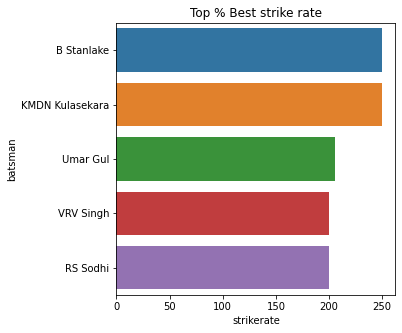

In [ ]:
plt.figure(figsize=(5,5)) # setting size of plot
plt.title('Top % Best strike rate')
ax = sns.barplot(x="strikerate", y='batsman', data = top_5_df3_best_strike_ratee)

## TOP 5 of Most runs

In [ ]:
df3

In [ ]:
df3_Most_runs = df3.sort_values(by=['total_runs'],ascending=False)

In [ ]:
top_5_df3_Most_runs = df3_Most_runs.head()
top_5_df3_Most_runs

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


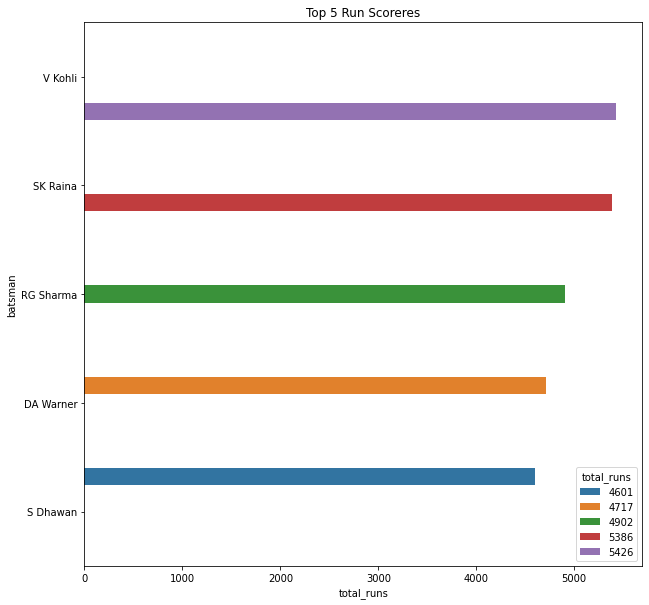

In [ ]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('Top 5 Run Scoreres')
ax = sns.barplot(x="total_runs", y='batsman', hue='total_runs', data = top_5_df3_Most_runs)

## TOP 5 Best average

In [ ]:
df3

In [ ]:
df3_best_average = df3.sort_values(by=['average'],ascending=False)

In [ ]:
top_5_df3_best_average = df3_best_average.head()
top_5_df3_best_average

,batsman,total_runs,out,numberofballs,average,strikerate
243,Iqbal Abdulla,88,1,83,88.000000,106.024096
109,J Bairstow,459,8,284,57.375000,161.619718
180,MN van Wyk,167,3,132,55.666667,126.515152
159,PD Collingwood,203,4,156,50.750000,130.128205
97,HM Amla,577,13,407,44.384615,141.769042


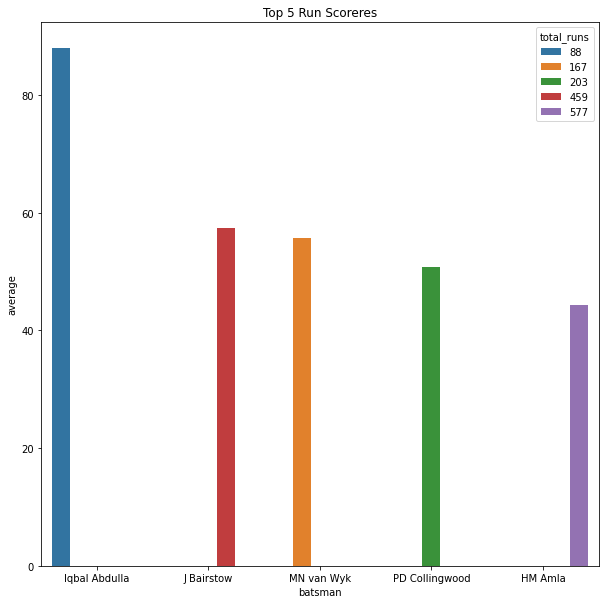

In [ ]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('Top 5 Run Scoreres')
ax = sns.barplot(y="average", x='batsman', hue='total_runs', data = top_5_df3_best_average)

## Home and Away vicotry Teamwise comparison

In [ ]:
df4

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [ ]:
home_wins = df4.sort_values(by=['home_wins'],ascending=False)
away_wins = df4.sort_values(by=['away_wins'],ascending=False)

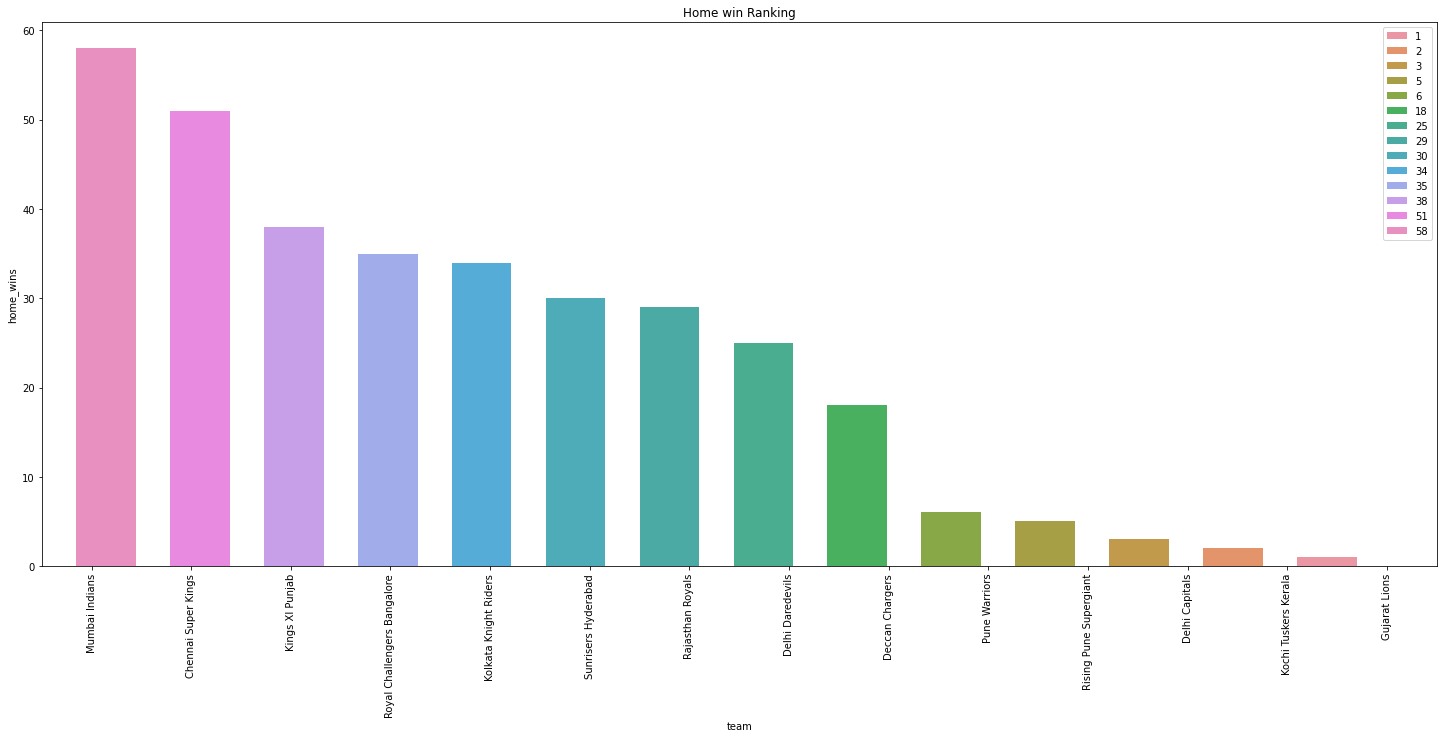

In [ ]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Home win Ranking')
ax = sns.barplot(y="home_wins", x='team', hue ='home_wins', data = home_wins)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend(loc='upper right')
for patch in ax.patches:
  current_width = patch.get_width()
  diff = current_width - .8
  patch.set_width(.6)
  patch.set_x(patch.get_x() - .5)


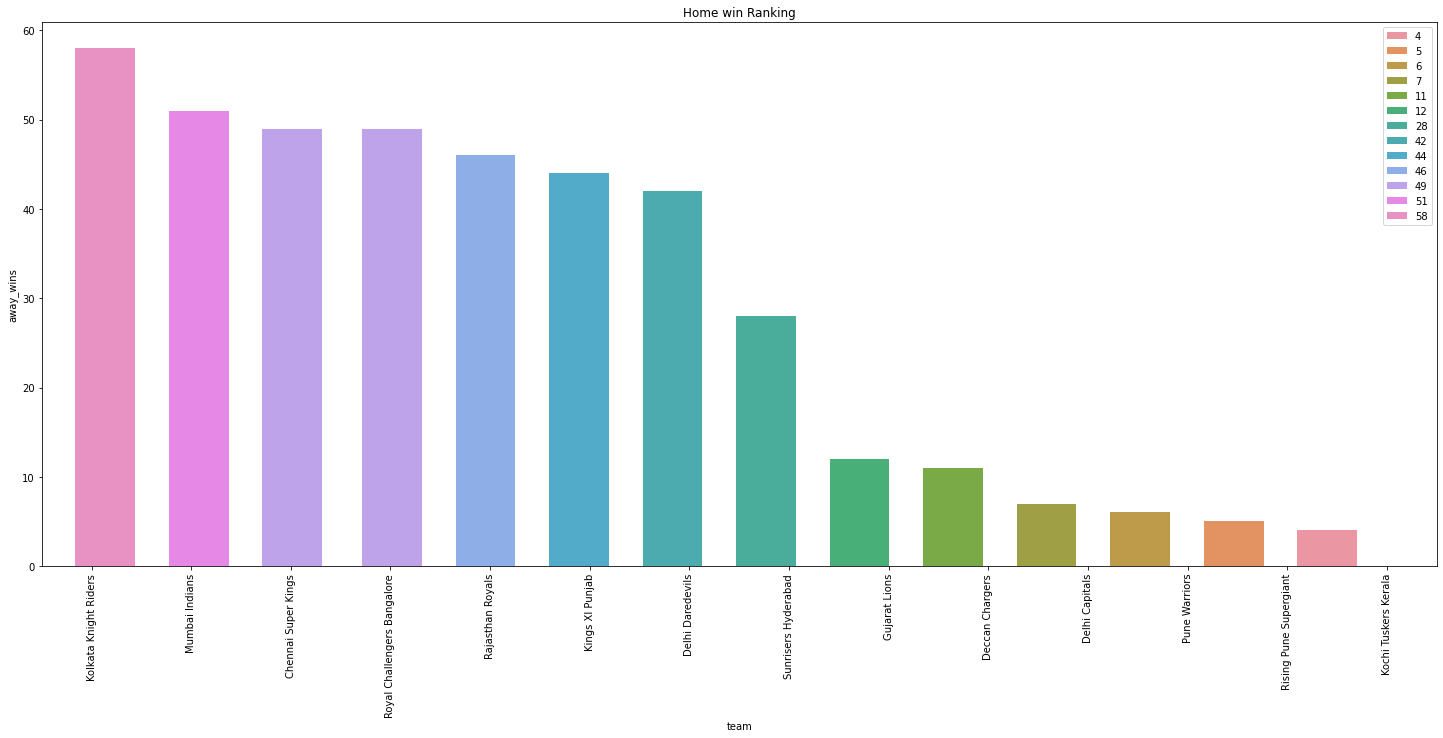

In [ ]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Home win Ranking')
ax = sns.barplot(y="away_wins", x='team', hue ='away_wins', data = away_wins)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
plt.legend(loc='upper right')
for patch in ax.patches:
  current_width = patch.get_width()
  diff = current_width - .8
  patch.set_width(.6)
  patch.set_x(patch.get_x() - .5)


In [ ]:

fig,axs = plt.subplots(ncols=2,figsize=(20,10))
ax = sns.barplot(x='team', y='home_win_percentage',  data=df4, ax=axs[0])
ax2 = sns.barplot(x='team', y='away_win_percentage', data=df4, ax=axs[1])
ax.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)

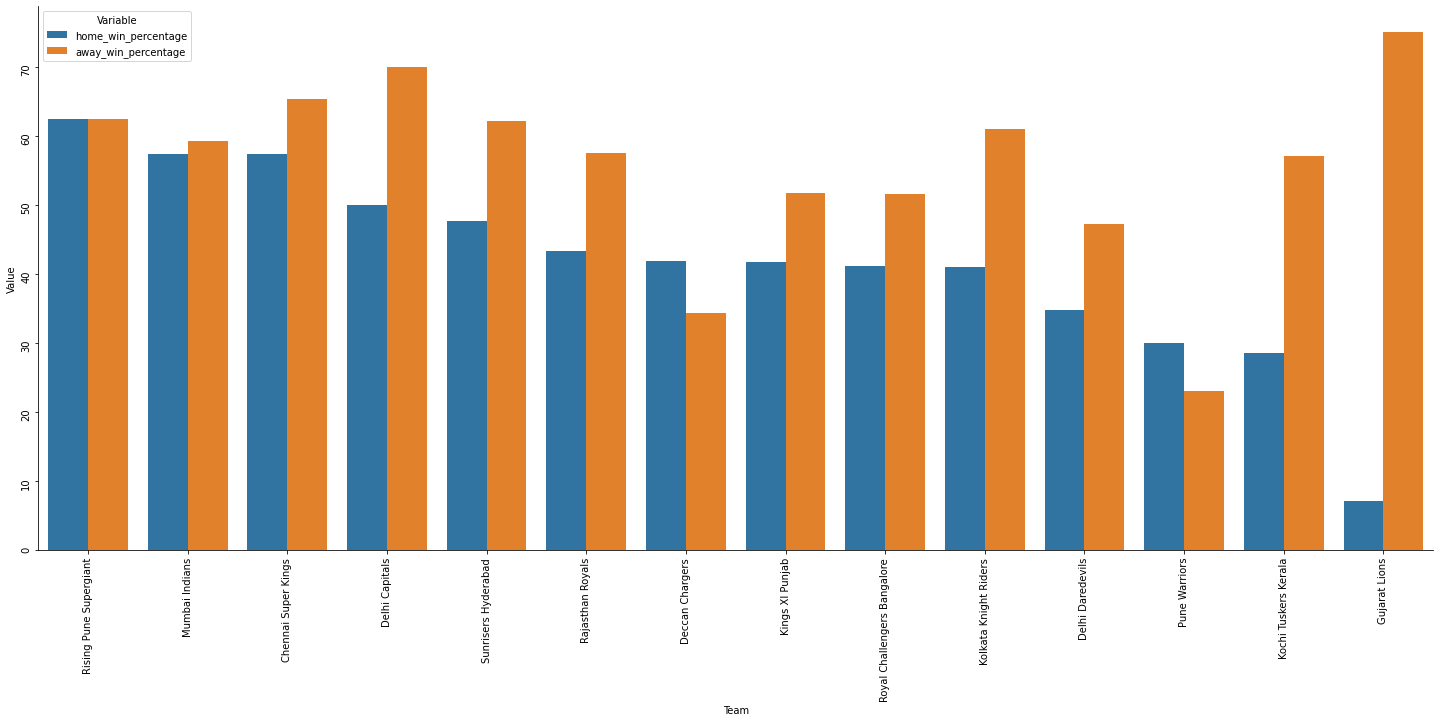

In [ ]:
nnew_df4 = df4.drop(columns=['home_wins','away_wins','home_matches','away_matches'])
fig, ax1 = plt.subplots(figsize=(25, 10))
tidy = nnew_df4.melt(id_vars='team').rename(columns=str.title)
sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.despine(fig)

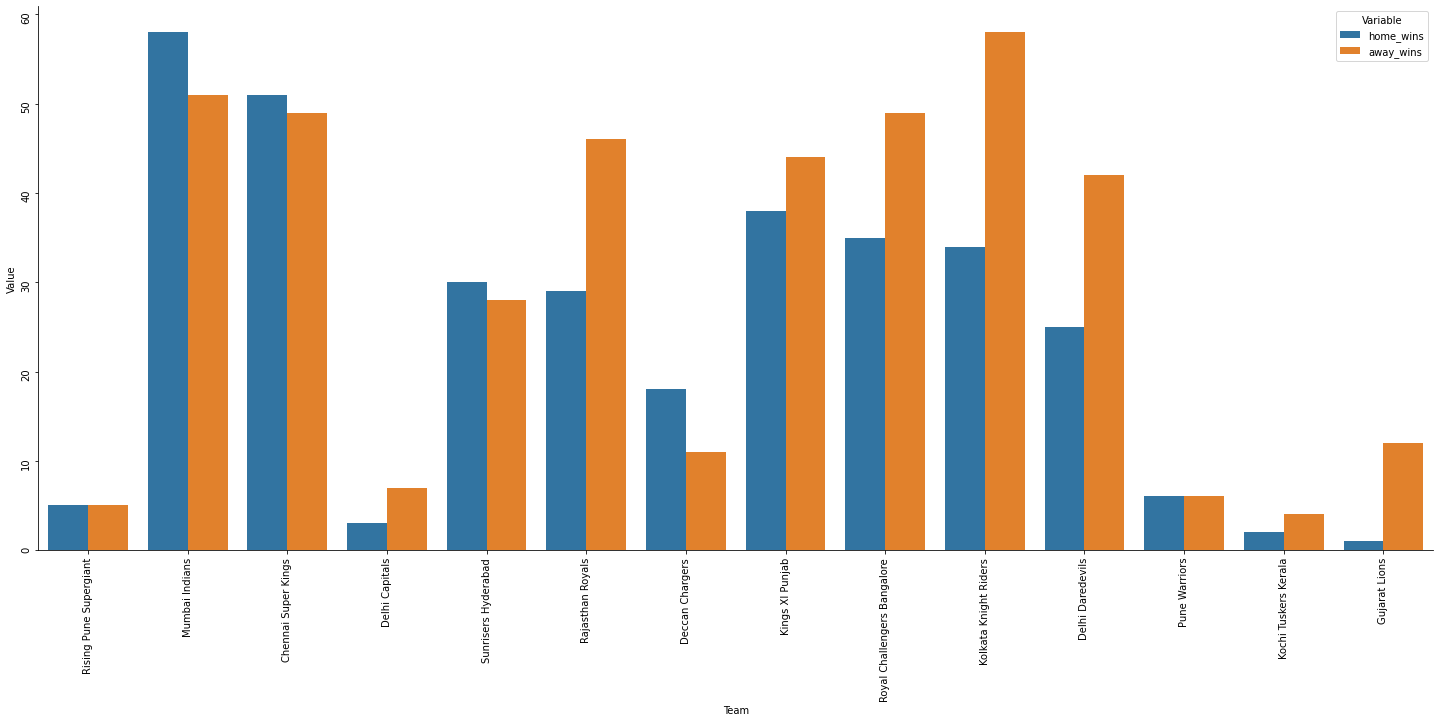

In [ ]:
new_df4 = df4.drop(columns=['home_win_percentage','away_win_percentage','home_matches','away_matches'])
fig, ax1 = plt.subplots(figsize=(25, 10))
tidy = new_df4.melt(id_vars='team').rename(columns=str.title)
sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.despine(fig)

## toss and match winner relation

In [ ]:
df5.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
toss_winner_df = df5[['toss_winner','winner']]
toss_winner_df

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
751,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians
753,Delhi Capitals,Delhi Capitals
754,Chennai Super Kings,Chennai Super Kings


In [ ]:
# creating a data frame that has counts of countries and players
toss_and_win = pd.DataFrame(toss_winner_df.value_counts()) # taking values and converting to df
toss_and_win = toss_and_win.reset_index() # resetting the index
toss_and_win.columns = ['toss_winner', 'match_winner','no_of_times'] # renaming columns
top_ten = toss_and_win.head(10)
top_ten

,toss_winner,match_winner,no_of_times
0,Chennai Super Kings,Chennai Super Kings,57
1,Mumbai Indians,Mumbai Indians,56
2,Kolkata Knight Riders,Kolkata Knight Riders,53
3,Rajasthan Royals,Rajasthan Royals,42
4,Royal Challengers Bangalore,Royal Challengers Bangalore,41
5,Delhi Daredevils,Delhi Daredevils,35
6,Kings XI Punjab,Kings XI Punjab,35
7,Sunrisers Hyderabad,Sunrisers Hyderabad,23
8,Deccan Chargers,Deccan Chargers,19
9,Rajasthan Royals,Chennai Super Kings,10


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

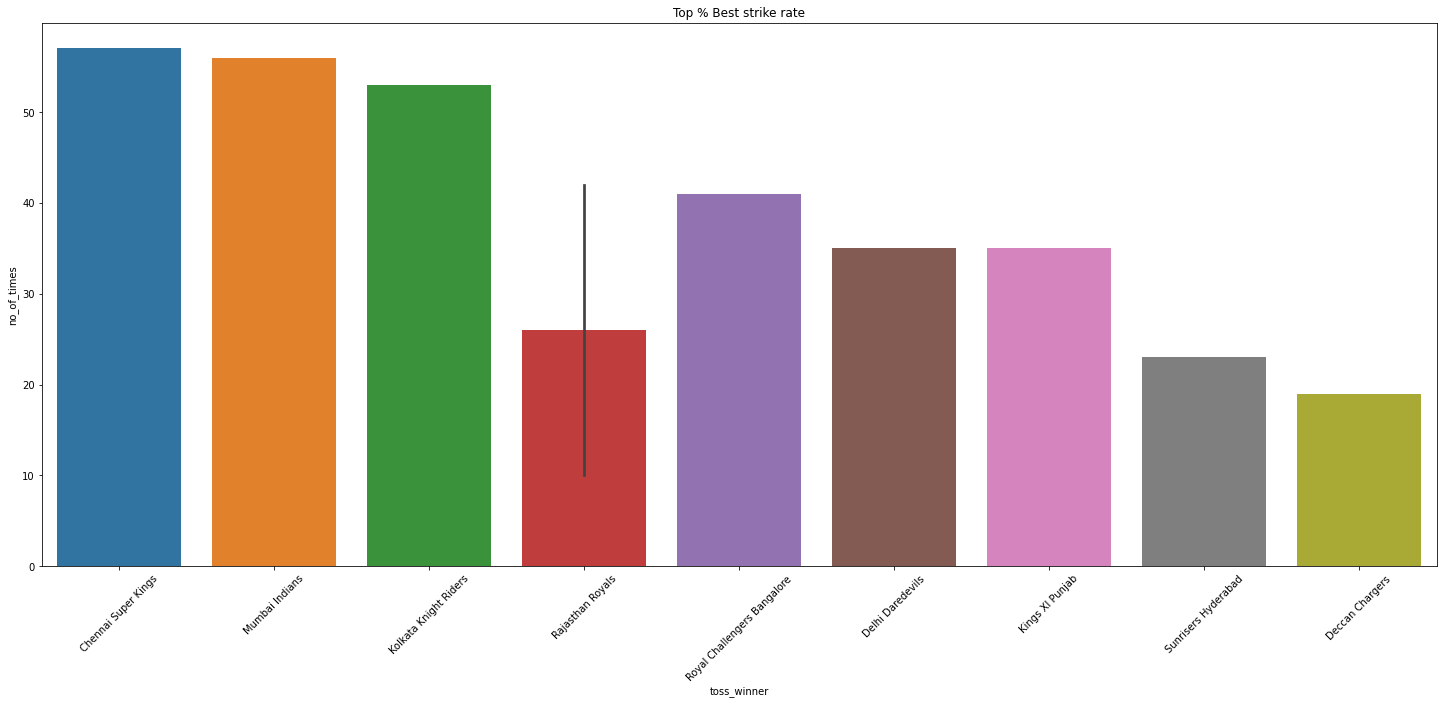

In [ ]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Top % Best strike rate')
ax = sns.barplot(x="toss_winner", y='no_of_times', data = top_ten)
plt.xticks(rotation = 45)

## City of game and match *relation*

In [ ]:
city_winner_df = df5[['city','winner']]
city_winner_df

,city,winner
0,Hyderabad,Sunrisers Hyderabad
1,Pune,Rising Pune Supergiant
2,Rajkot,Kolkata Knight Riders
3,Indore,Kings XI Punjab
4,Bangalore,Royal Challengers Bangalore
...,...,...
751,Mumbai,Mumbai Indians
752,Chennai,Mumbai Indians
753,Visakhapatnam,Delhi Capitals
754,Visakhapatnam,Chennai Super Kings


In [ ]:
# creating a data frame that has counts of countries and players
city_and_win = pd.DataFrame(city_winner_df.value_counts()) # taking values and converting to df
city_and_win = city_and_win.reset_index() # resetting the index
city_and_win.columns = ['City', 'match_winner','no_of_times'] # renaming columns
top_ten_city_winner = city_and_win.head(10)
top_ten_city_winner

,City,match_winner,no_of_times
0,Mumbai,Mumbai Indians,53
1,Kolkata,Kolkata Knight Riders,45
2,Chennai,Chennai Super Kings,40
3,Jaipur,Rajasthan Royals,32
4,Hyderabad,Sunrisers Hyderabad,30
5,Bangalore,Royal Challengers Bangalore,30
6,Delhi,Delhi Daredevils,27
7,Chandigarh,Kings XI Punjab,22
8,Mumbai,Chennai Super Kings,11
9,Kolkata,Mumbai Indians,10


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

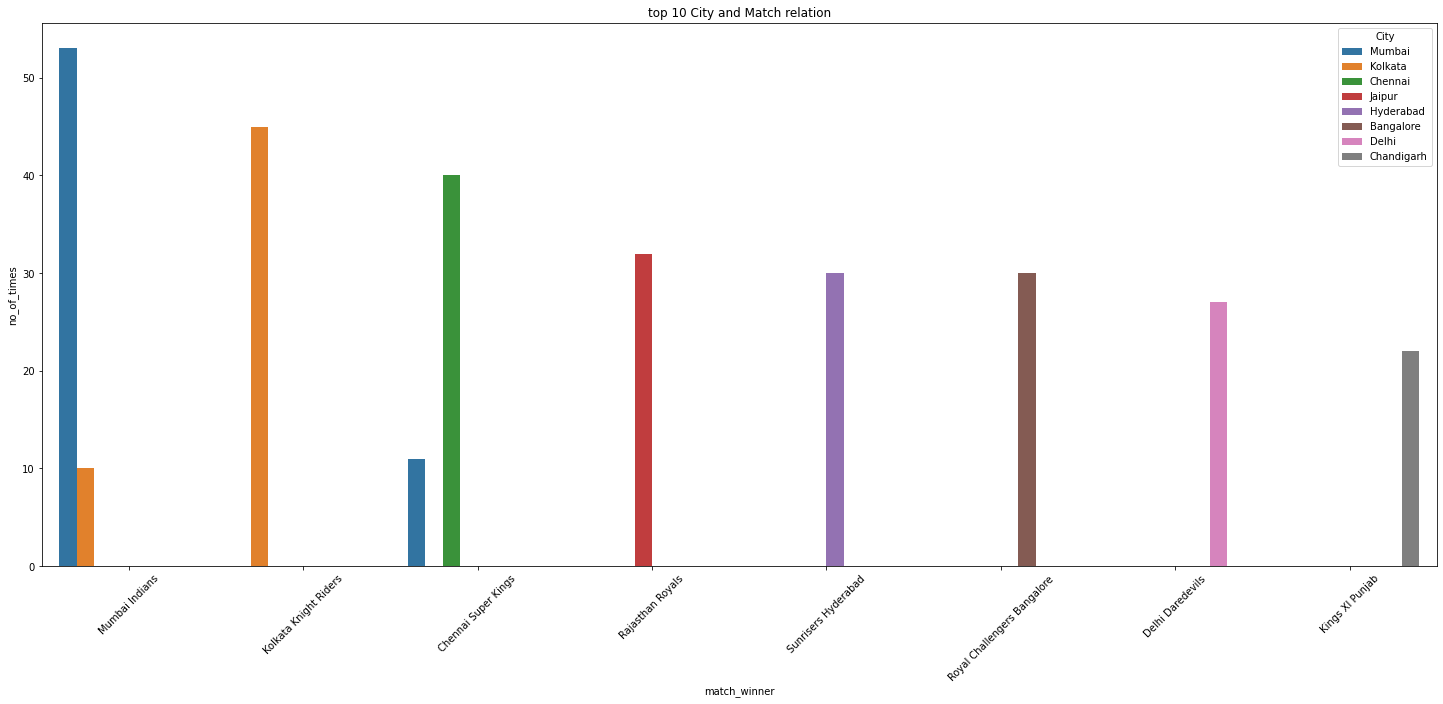

In [ ]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('top 10 City and Match relation')
ax = sns.barplot(x="match_winner", y='no_of_times',hue="City", data = top_ten_city_winner)
plt.xticks(rotation = 45)

In [ ]:
df5.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
team_city = pd.DataFrame() 
team_city['Team'] = df6.team1
team_city['from_City'] = ['Pune','Kolkata', 'Jaipur', 'Kochi','Ahmedabad', 'Chennai',"Pune",'Delhi','Hyderabad',"Delhi",'Mumbai',"Hyderabad","Pune","Bengaluru","Mohali"]
team_city

,Team,from_City
0,Pune Warriors,Pune
1,Kolkata Knight Riders,Kolkata
2,Rajasthan Royals,Jaipur
3,Kochi Tuskers Kerala,Kochi
4,Gujarat Lions,Ahmedabad
5,Chennai Super Kings,Chennai
6,Rising Pune Supergiants,Pune
7,Delhi Daredevils,Delhi
8,Deccan Chargers,Hyderabad
9,Delhi Capitals,Delhi


## top 5 man of match 

In [ ]:
df5

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
# creating a data frame that has counts of countries and players
player_of_match = pd.DataFrame(df5['player_of_match'].value_counts()) # taking values and converting to df
player_of_match = player_of_match.reset_index() # resetting the index
player_of_match.columns = ['Player','no_of_times'] # renaming columns
top_player_of_match = player_of_match.head(5)
top_player_of_match

,Player,no_of_times
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17


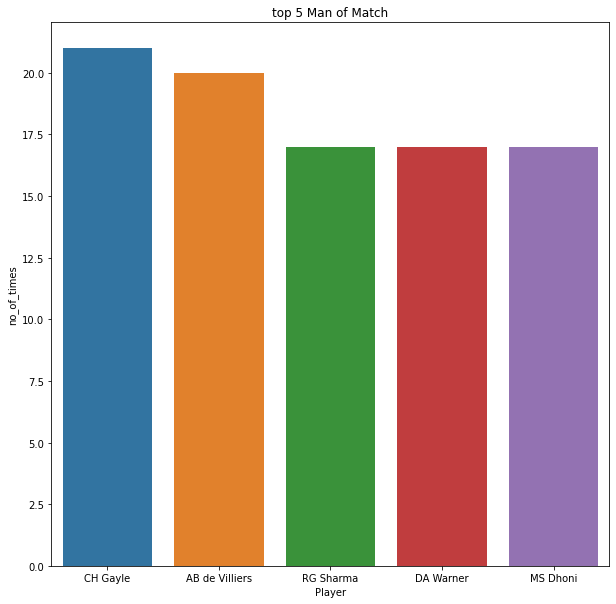

In [ ]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('top 5 Man of Match')
ax = sns.barplot(x="Player", y='no_of_times', data = top_player_of_match)


## top 5 win by max runs

In [ ]:
df5

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [ ]:
run_winner_df = df5[['winner','win_by_runs']]
run_winner_df_sorted = run_winner_df.sort_values(by=['win_by_runs'],ascending=False)
top_run_winner_df = run_winner_df_sorted.head()
top_run_winner_df

,winner,win_by_runs
43,Mumbai Indians,146
619,Royal Challengers Bangalore,144
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
410,Royal Challengers Bangalore,130


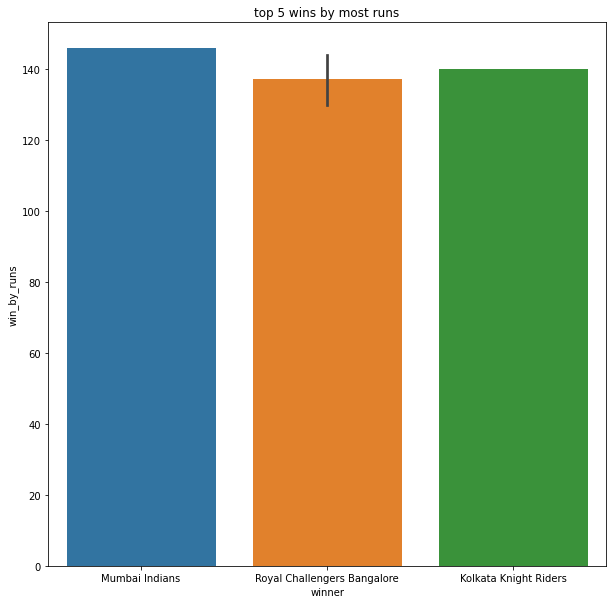

In [ ]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('top 5 wins by most runs')
ax = sns.barplot(x="winner", y='win_by_runs', data = top_run_winner_df)


## most common way of dismissal

In [ ]:
way_out_df = df2[['dismissal_kind']]
way_out_df.dropna()

,dismissal_kind
11,caught
64,caught
94,caught
116,bowled
160,bowled
...,...
179019,caught
179033,run out
179067,caught
179075,run out


In [ ]:
# creating a data frame that has counts of countries and players
most_way_out_df = pd.DataFrame(way_out_df.value_counts()) # taking values and converting to df
most_way_out_df = most_way_out_df.reset_index() # resetting the index
most_way_out_df.columns = ['type','no_of_times'] # renaming columns
most_way_out_df

,type,no_of_times
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


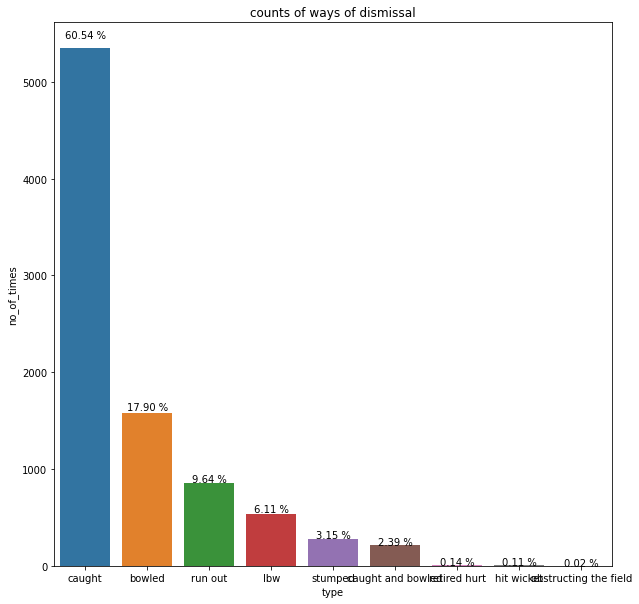

In [ ]:
# plot = most_way_out_df.plot.pie(y='no_of_times', figsize=(5, 5))
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('counts of ways of dismissal')
ax = sns.barplot(x="type",y="no_of_times",data=most_way_out_df)
total = most_way_out_df['no_of_times'].sum()
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

## top 10 wicket takers


In [ ]:
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
bowler_out_df = df2[['bowler','dismissal_kind']]
bowler_out_df.dropna()

,bowler,dismissal_kind
11,A Choudhary,caught
64,STR Binny,caught
94,YS Chahal,caught
116,TS Mills,bowled
160,Rashid Khan,bowled
...,...,...
179019,JJ Bumrah,caught
179033,HH Pandya,run out
179067,JJ Bumrah,caught
179075,SL Malinga,run out


In [ ]:
# creating a data frame that has counts of countries and players
most_wickets_df = pd.DataFrame(bowler_out_df['bowler'].value_counts()) # taking values and converting to df
most_wickets_df = most_wickets_df.reset_index() # resetting the index
most_wickets_df.columns = ['bowler','no_of_times'] # renaming columns
top_10_wicket_takers = most_wickets_df.head(10)
top_10_wicket_takers

,bowler,no_of_times
0,Harbhajan Singh,3451
1,A Mishra,3172
2,PP Chawla,3157
3,R Ashwin,3016
4,SL Malinga,2974
5,DJ Bravo,2711
6,B Kumar,2707
7,P Kumar,2637
8,UT Yadav,2605
9,SP Narine,2600


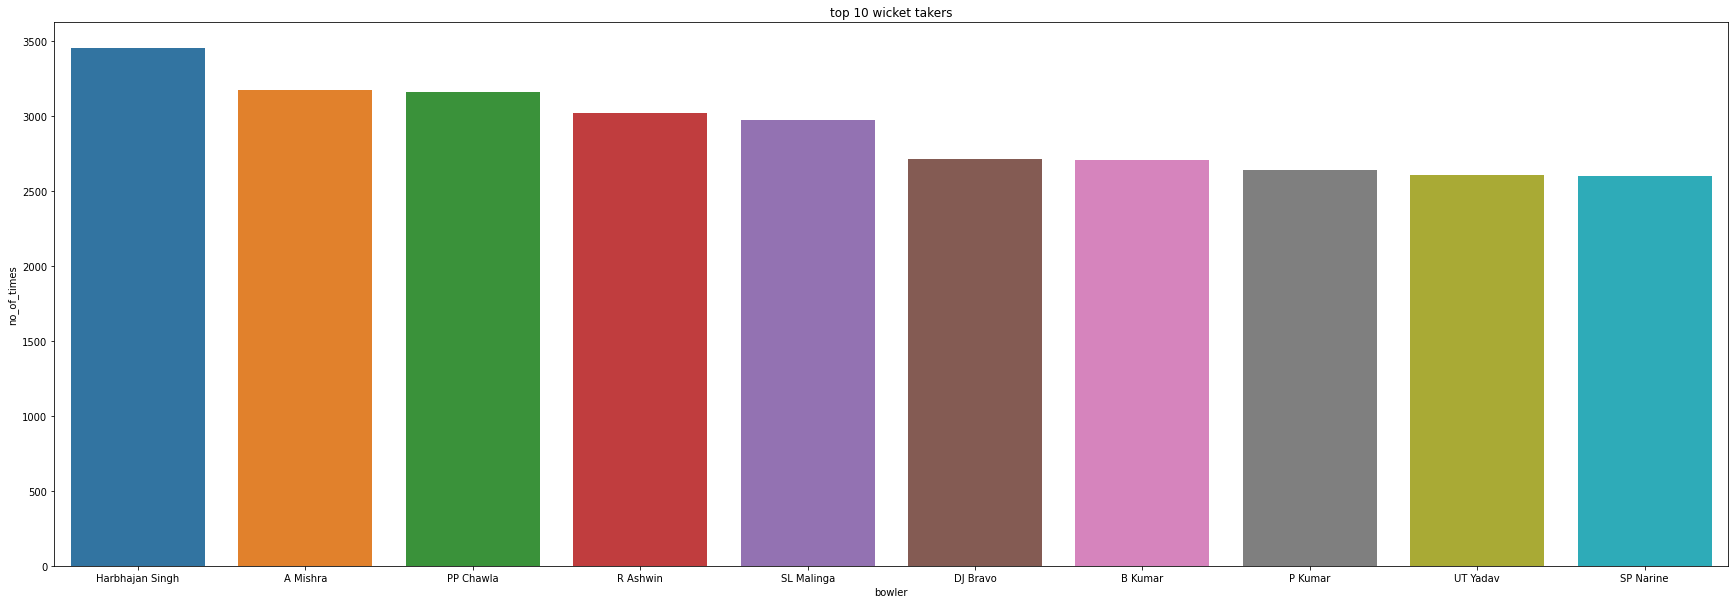

In [ ]:
plt.figure(figsize=(30,10)) # setting size of plot
plt.title('top 10 wicket takers')
ax = sns.barplot(x="bowler",y="no_of_times",data=top_10_wicket_takers)

## top 10 wicket takers with kkind of dismissal


In [ ]:
df2

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
list_of_no_bowler_wicket = [ 'run out','retired hurt', 'hit wicket', 'obstructing the field']
bowler_out_df = df2[['bowler','dismissal_kind']]
bowler_out_df2.dropna()
bowler_out_df2 = bowler_out_df[~bowler_out_df['dismissal_kind'].isin(list_of_no_bowler_wicket)]
bowler_out_df2
bowler_out_df2.dropna()

,bowler,dismissal_kind
11,A Choudhary,caught
64,STR Binny,caught
94,YS Chahal,caught
116,TS Mills,bowled
160,Rashid Khan,bowled
...,...,...
178977,KH Pandya,stumped
179012,RD Chahar,lbw
179019,JJ Bumrah,caught
179067,JJ Bumrah,caught


In [ ]:
# creating a data frame that has counts of countries and players
most_wickets_df = pd.DataFrame(bowler_out_df2.value_counts()) # taking values and converting to df
most_wickets_df = most_wickets_df.reset_index() # resetting the index
most_wickets_df.columns = ['bowler',"dismissal_kind",'no_of_times'] # renaming columns
top__wicket_takers = most_wickets_df
top__wicket_takers.sort_values(by='bowler')

,bowler,dismissal_kind,no_of_times
507,A Ashish Reddy,lbw,3
321,A Ashish Reddy,bowled,6
693,A Ashish Reddy,caught and bowled,1
244,A Ashish Reddy,caught,8
369,A Chandila,caught and bowled,5
...,...,...,...
106,Yuvraj Singh,caught,19
218,Z Khan,lbw,9
88,Z Khan,bowled,22
937,Z Khan,caught and bowled,1


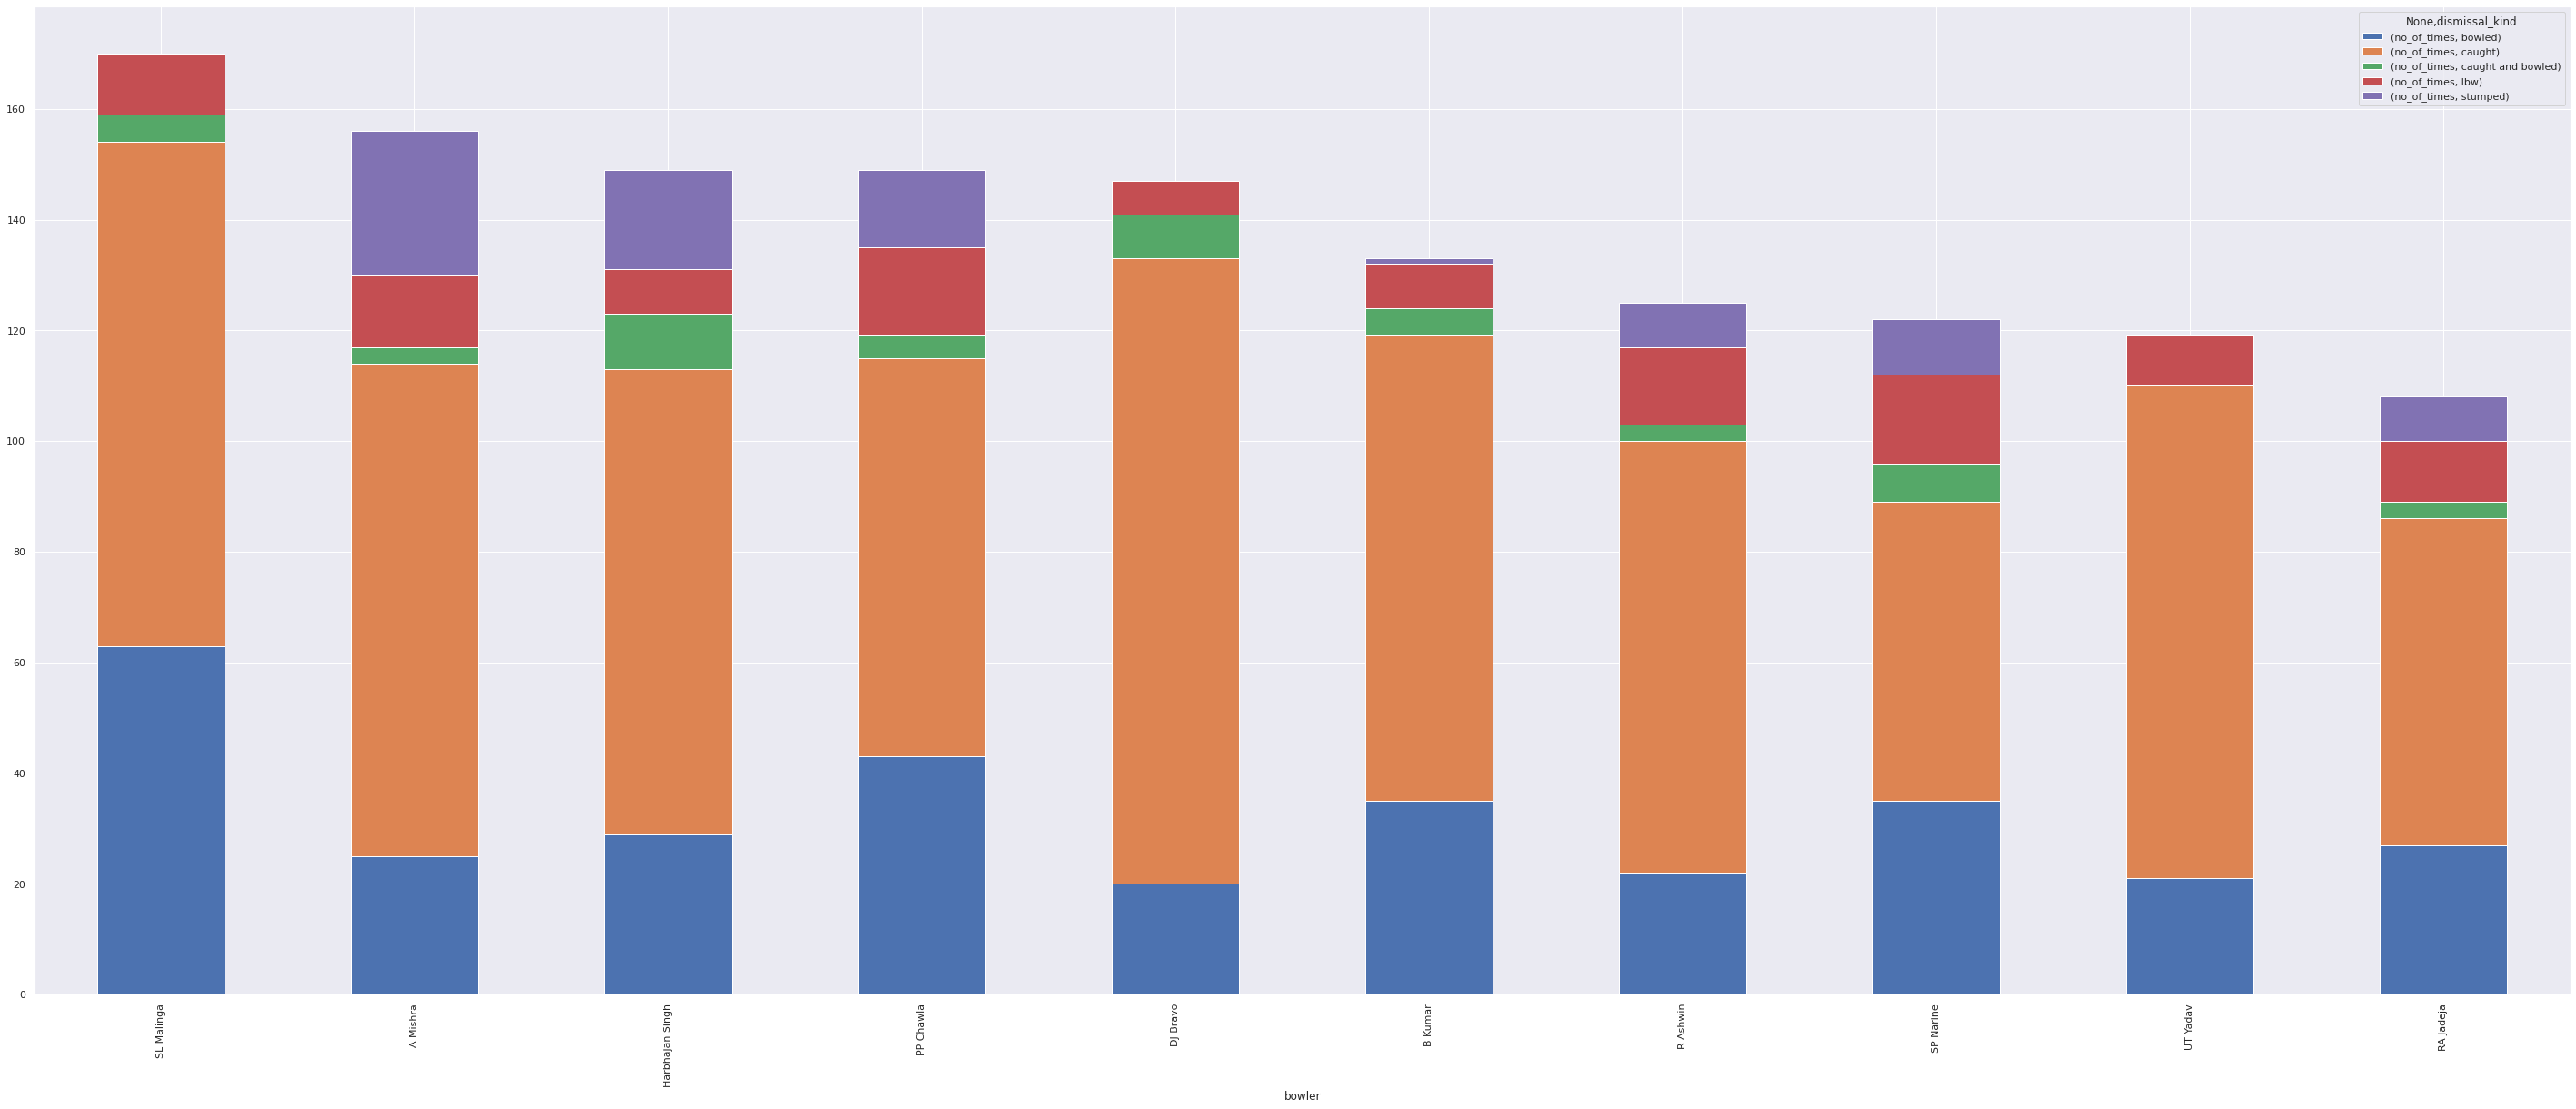

In [ ]:
df112 = top__wicket_takers.groupby(['bowler','dismissal_kind']).sum().unstack().fillna(0)
df112.columns
sum_column = df112['no_of_times', "bowled"]+ df112['no_of_times',"caught"]+ df112['no_of_times',"caught and bowled"]+ df112['no_of_times',"lbw"]+ df112['no_of_times',"stumped"]
df112['total wickets'] = sum_column
df112 = df112.sort_values(by='total wickets',ascending=False)
df112 = df112.drop(columns=["total wickets"])
final_graph = df112.head(10)
final_graph.plot(kind='bar',stacked=True,legend="dismissal_kind",figsize=(50,20))

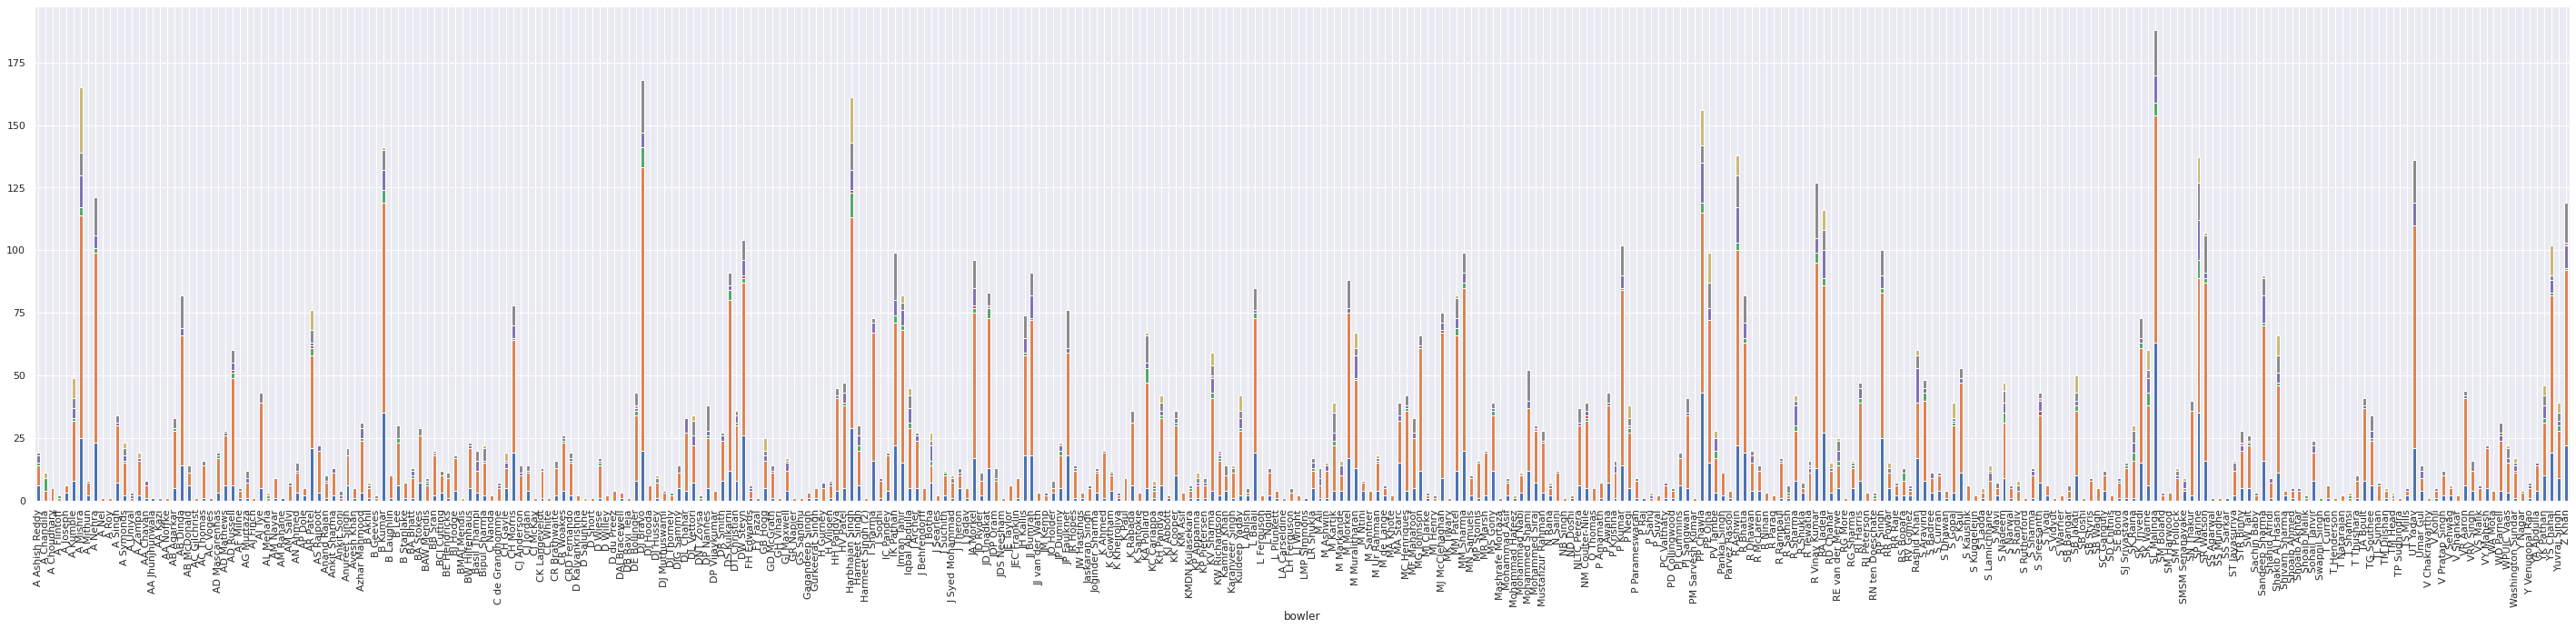

In [ ]:

top_10_wicket_takers_new = top__wicket_takers.pivot(columns='dismissal_kind',index='bowler').fillna(0)
#plot it
top_10_wicket_takers_new.plot(kind='bar',stacked=True,legend=False,figsize=(50,10))
# plt.figure(figsize=(30,10)) # setting size of plot
# plt.show()